In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from util.scrape_log import scrape_search_log
from dataset.goose_domain_info import GOOSE_DOMAINS as DOMAINS
from dataset.goose_domain_info import get_domain_instance_pddl_for_domain

In [32]:
_LOG_DIR = "aaai24_logs/test"

In [33]:
"/home/dillon/code/goose-aaai24/learner/aaai24_logs/test/blocks15-task01_dd_llg_blocks_L4_H64_max_p10.log"
MODELS = [("dd_llg", "L4_H64_max_p10"), ("dd_llg", "L4_H64_mean_p10")]
DOMAINS = sorted(DOMAINS)

In [34]:
coverage = {k:0 for k in product(MODELS, DOMAINS)}
expanded = {k:[] for k in product(MODELS, DOMAINS)}

for model, domain in product(MODELS, DOMAINS):
    for _, _, pf in get_domain_instance_pddl_for_domain(domain, "test"):
        problem_name = os.path.basename(pf).replace(".pddl", "")
        log_file = "_".join([problem_name, model[0], domain, model[1]])
        log_file = f"{_LOG_DIR}/{log_file}.log"
        stats = scrape_search_log(log_file)
        coverage[(model, domain)] += stats["solved"]
        expanded[(model, domain)].append(stats["expanded"])

### Coverage

In [35]:
data = {"domain": []}
for model in MODELS:
    data[model] = []
for domain in DOMAINS:
    data["domain"].append(domain)
    for model in MODELS:
        data[model].append(coverage[(model, domain)])
df = pd.DataFrame(data=data)
df

,domain,"(dd_llg, L4_H64_max_p10)","(dd_llg, L4_H64_mean_p10)"
0,blocks,21,56
1,ferry,81,60
2,gripper,18,18
3,n-puzzle,0,0
4,sokoban,40,18
5,spanner,60,45
6,visitall,44,41
7,visitsome,20,71


### Expanded

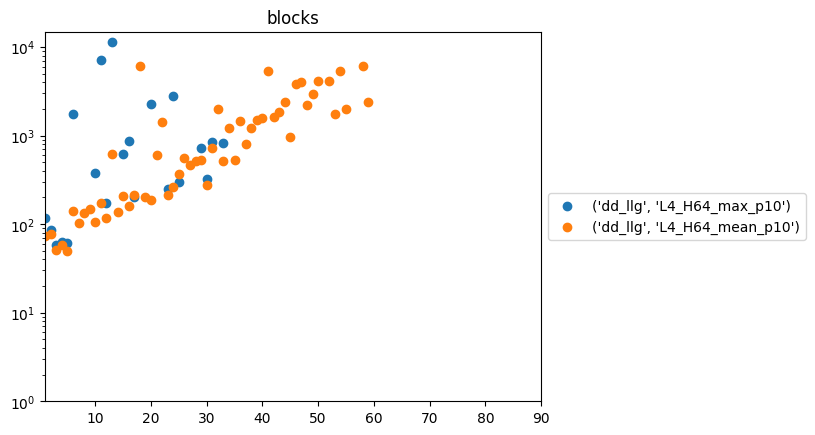

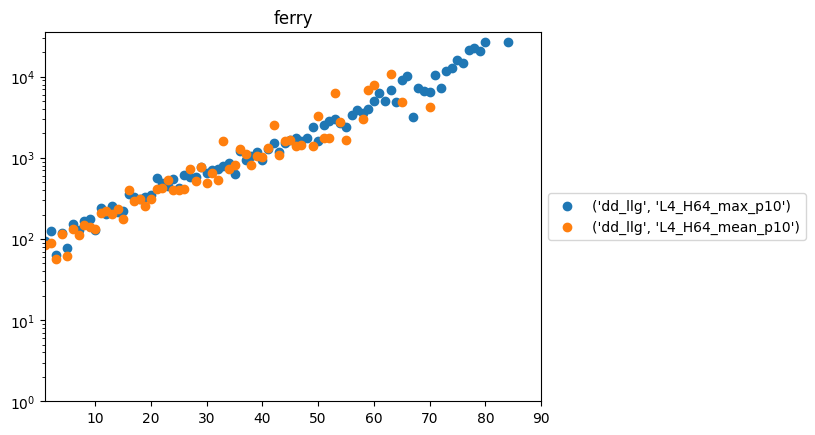

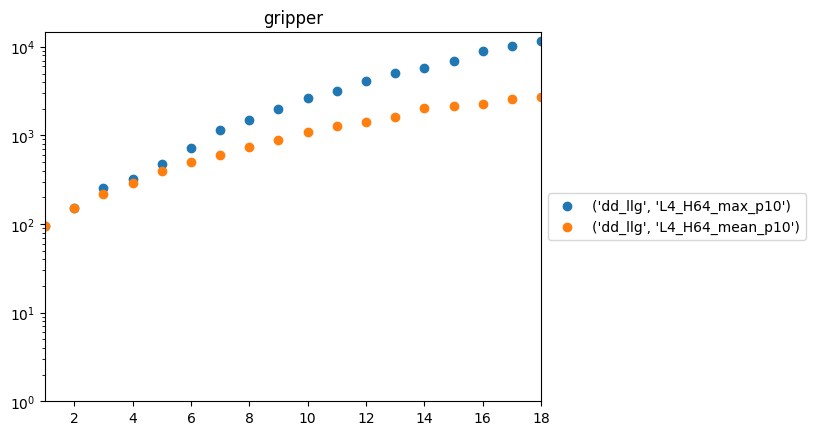

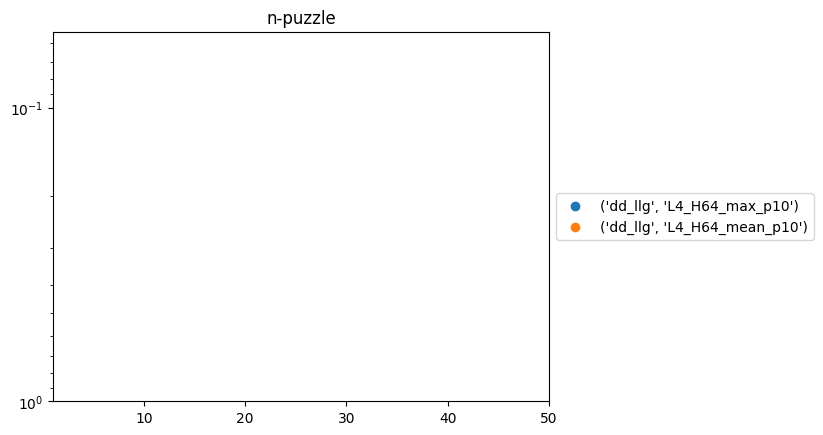

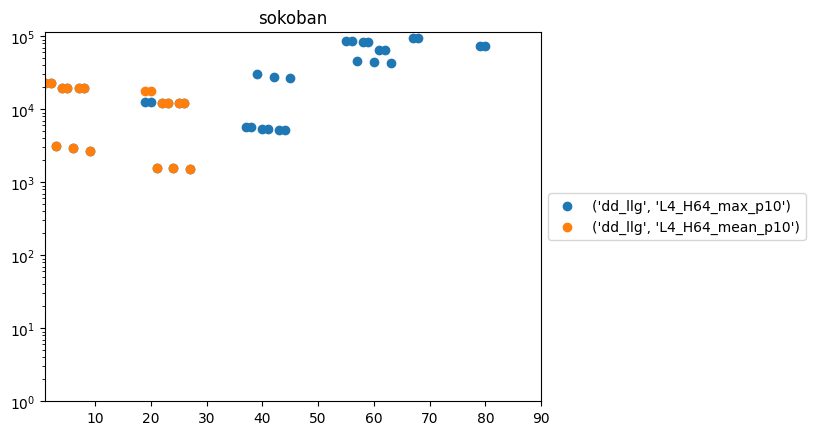

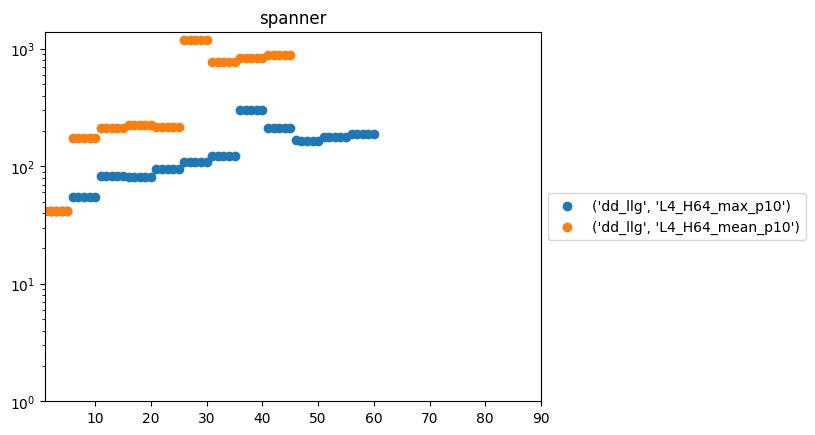

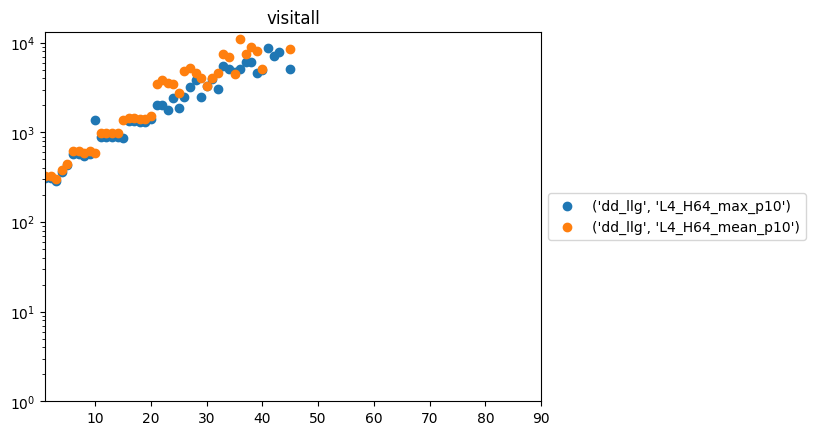

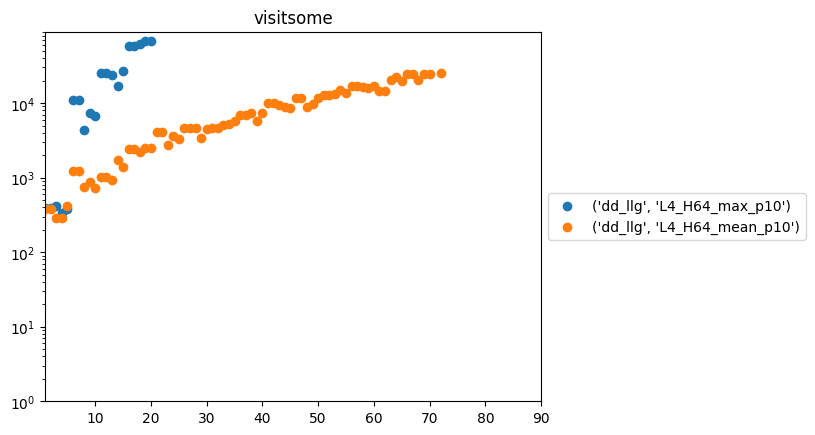

<Figure size 640x480 with 0 Axes>

In [36]:
for domain in DOMAINS:
    for model in MODELS:
        xs, ys = [], []
        expanded_array = expanded[(model, domain)]
        for i, exp in enumerate(expanded_array):
            if exp == -1:
                continue
            xs.append(i+1)
            ys.append(exp)
        plt.scatter(xs, ys, label=model)
    plt.title(domain)
    plt.xlim((1, len(expanded_array)))
    plt.yscale("log")
    plt.ylim(bottom=1)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.clf()